# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

Following the initial publication of the book in 2011, Erica Chenoweth continued her research on the topic and published a follow-up ten years later, [Civil Resistance: What Everyone Needs to Know](https://www.ericachenoweth.com/research/civil-resistance-what-everyone-needs-to-know). She has also continued to update the data used for her research.

The research became famous for propising the 3.5% rule: "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event"; you can find a nice overview at [Questions, Answers, and Some Cautionary
Updates Regarding the 3.5% Rule](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf). Among other things, you will investigate that rule.

To answer the questions, you will use that data, the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). You will also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), in particular the Polity5 version, available from [Integrated Network for Societal Conflict Research (INSCR) ](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls).

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

## 1. Exploration of Historical Trends

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

Your plot should look like the following:

<img src="fig_1.svg"/>

* Import the required libraries to our assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 
import statsmodels
from statsmodels.formula.api import logit
from IPython.display import display
%matplotlib inline

* We import our "NAVCO 1.2 Updated.xlsx" Dataset named `df` to create a plot showing the frequency of `nonviolent` and `violent` campaigns; the frequency should be counted based on their end years, at decades. Also the violent and nonviolent campaign counts should be stacked on each other. Also we can see the `shape` of the DataFrame.

In [2]:
df = pd.read_excel("NAVCO 1.2 Updated.xlsx")
df

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,...,0,613,10000.0,0.000641,1,1,NaN,1.0,1,1
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,...,0,3281,10000.0,0.000685,1,0,NaN,1.0,0,1
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,...,0,1370,20000.0,0.000893,1,0,NaN,1.0,0,0
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,...,0,4391,60000.0,0.001625,1,1,NaN,1.0,1,0
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,0,442,300000.0,0.091068,1,0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,249,Zambian independence movement,Zambia,1961,1963,British rule,1,0,0,0,...,0,913,1000000.0,0.285063,0,1,0.0,0.0,0,0
385,248,Zambia anti-single party rule,Zambia,1990,1991,One-party rule,1,0,0,0,...,0,488,23000.0,0.002791,1,0,0.0,1.0,0,0
386,12,anti-Chiluba campaign,Zambia,2001,2001,Chiluba regime,1,0,0,0,...,0,213,3000.0,0.000277,0,0,0.0,0.0,0,0
387,250,Zimbabwe African People's Union,Zimbabwe,1972,1979,Smith/Muzorena regime,0,1,0,0,...,0,2556,1000.0,0.000145,1,0,NaN,0.0,1,0


In [3]:
df.shape

(389, 25)

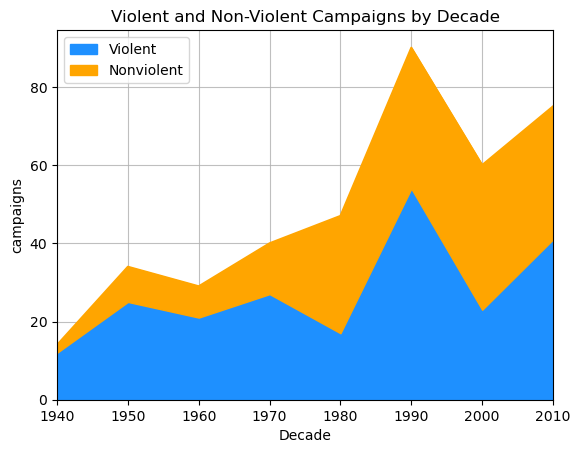

In [4]:
# Step 1: Convert the "end year" column to decades
df['Decade'] = (df['EYEAR'] // 10) * 10

# Step 2: Group by "decade" and "nonviolence_status"
grouped_data = df.groupby(['Decade', 'NONVIOL']).size().unstack(fill_value=0)

# Step 3: Create a stacked bar plot
grouped_data.plot(kind='area', stacked=True,color=['dodgerblue','orange'],zorder=2)

# Adding labels
plt.xlabel('Decade')
plt.ylabel('campaigns')
plt.title('Violent and Non-Violent Campaigns by Decade')

# Custom legend
legend_elements = [
    Patch(color='dodgerblue', label='Violent'),
    Patch(color='orange', label='Nonviolent')
]
plt.legend(handles=legend_elements, loc='upper left')
plt.grid()
plt.xlim(1940,2010)

plt.grid(zorder=0, linestyle='-', alpha=0.8)
# Display the plot
plt.show()

* As we can see from the frequency plot, over the decades there are more nonviolent campaigns than violent campaigns and it is something reasonable. In the beginning, we convert the years in decades based on the `EYEAR` column, after that we groupby the `Decade` column and `NONVIOL` column. The `unstack` method is used to pivot a level of the index labels. When you provide `fill_value=0`, it means that any missing values (NaN) will be filled with the specified value (in this case, 0).



Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics, and it should look like this:

<img src="fig_2.svg"/>

* We think as a successfull outcome as only the outcome which has complete success of the campaign's description. As denoted by the codebook, we use only the column 'SUCCESS' and no other column. 

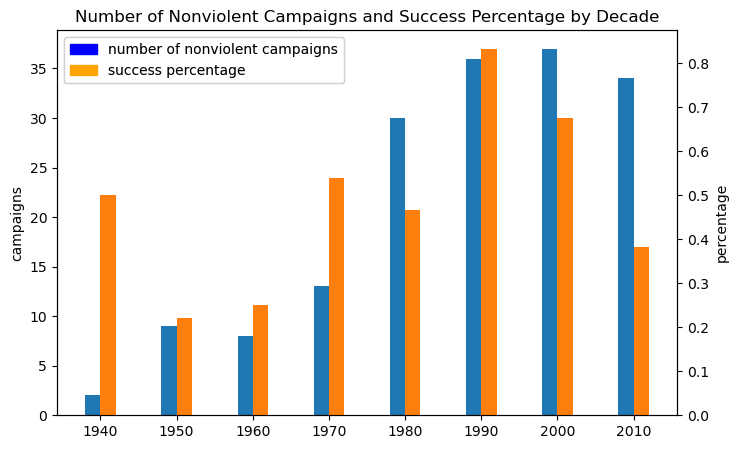

In [5]:
df['EYEAR'] = pd.to_datetime(df['EYEAR'],format='%Y',errors='coerce')


# Create a new column for the decade
df['Decade'] = (df['EYEAR'].dt.year // 10) * 10

#Non violent campaigns
NonViolent_df = df[df['NONVIOL']==1]


# Group by decade and count the number of nonviolent campaigns and calculate the success percentage
decade_stats = NonViolent_df[NonViolent_df['EYEAR'].dt.year >= 1940].groupby('Decade').agg(
    Numcampaigns=('NONVIOL','sum'),
    SuccessPercentage=('SUCCESS','mean')
).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for the number of nonviolent campaigns
bar_width = 2
bar1 = ax1.bar(decade_stats['Decade'] - bar_width/2, decade_stats['Numcampaigns'], bar_width, label='number of nonviolent campaigns', color='tab:blue')

# Create a second y-axis to plot the success percentage
ax2 = ax1.twinx()
bar2 = ax2.bar(decade_stats['Decade'] + bar_width/2, decade_stats['SuccessPercentage'] , bar_width, label='success percentage', color='tab:orange')

# Combine legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left')

# Custom legend
legend_elements = [
    Patch(color='blue', label='number of nonviolent campaigns'),
    Patch(color='orange', label='success percentage')
]
plt.legend(handles=legend_elements, loc='upper left')

ax1.set_ylabel("campaigns")
ax2.set_ylabel("percentage")


# Display the plot
plt.title('Number of Nonviolent Campaigns and Success Percentage by Decade')
plt.show()

* As for the `success percentage`, we see that the highest percentage is in the 1990's decade. This can be probably cause of the  ending of the `Cold War` (https://en.wikipedia.org/wiki/Cold_War). Despite that, through the decades the `success percentage` goes up and down. As for the `number of nonviolent campaigns`, we that though the decades is going higher and higher until 2010's, which can observe a small reduction.

Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should look like the following, showing that nonviolent campaigns have higher success probabilities:

<img src="fig_3.svg" />

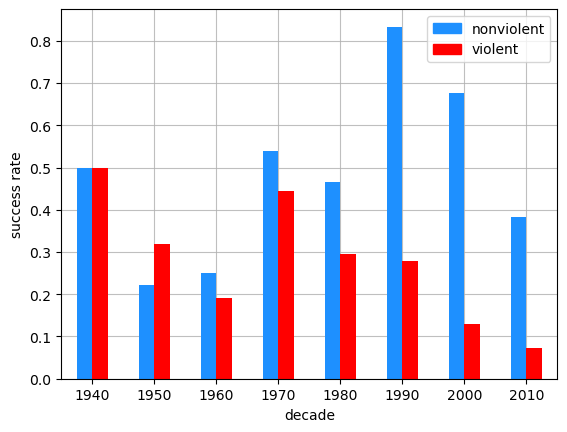

In [6]:
# convert the 'EYEAR' column to datetime
df['EYEAR'] = pd.to_datetime(df['EYEAR'],format='%Y',errors='coerce')


# Create a new column for the decade taking only the year from the 'EYEAR' column
df['Decade'] = (df['EYEAR'].dt.year // 10) * 10

#Non violent campaigns
Nonviolent_df = df[df['NONVIOL']==1]
#Violent campaigns
violent_df = df[df['NONVIOL']==0]


# Group by decade and count the number of nonviolent campaigns and calculate the success percentage
decade_stats_nviolent = Nonviolent_df[Nonviolent_df['EYEAR'].dt.year >= 1940].groupby('Decade').agg(
    SuccessPercentage=('SUCCESS','mean')
)
# Group by decade and count the number of violent campaigns and calculate the success percentage
decade_stats_violent = violent_df[violent_df['EYEAR'].dt.year >= 1940].groupby('Decade').agg(
    SuccessPercentage=('SUCCESS','mean')
)

# Merge the two DataFrames and plot them
success_df = decade_stats_nviolent.merge(decade_stats_violent,on='Decade')
success_df.plot(kind='bar',color=['dodgerblue','red'],zorder=2)
plt.xlabel('decade')
plt.ylabel('success rate')

# Custom legend
legend_elements = [
    Patch(color='dodgerblue', label='nonviolent'),
    Patch(color='red', label='violent')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.xticks(rotation=0)
plt.grid(zorder=0, linestyle='-', alpha=0.8)
plt.show()

* For this plot, we see that in 1940 the `success rate` of `violent` and `nonviolent` campaigns are equal, in 1950 the `success` rate of `violent` campaigns is higher than the `success rate` of the `nonviolent` campaigns etc. Going through the decades, the range between the `success rate` of `violent` and `nonviolent` campaigns is getting higher with the `success rate` of the `nonviolent` campaigns to be much bigger than the `success rate` of the `violent` campaigns.

## 2. Largest Resistance Campaigns, 1946-2014

Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%. The plot should look like the one below.

Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

<img src='participation_2pct.svg'>

* First we examine any findings about `Greece`, after we make the plot. As we can see from the code below, `Greece` participate in two campaigns, one during the `Greek Civil War` (more info here : https://en.wikipedia.org/wiki/Greek_Civil_War) and the other was in the `Athens Polytechnic Uprising` (https://en.wikipedia.org/wiki/Athens_Polytechnic_uprising). Also, we can observe that percentage of the participants in both of the campaigns are extremely low and close to zero (~0.5% for the first and ~0.02%) and by that we can tell that the percentages don't verify the 3.5% rule of Chenoweth: "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event".

In [7]:
df[df['LOCATION']=='Greece']

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,Decade
119,401,Greek Civil War,Greece,1946,1949-01-01,British and US occupation,0,0,1,0,...,1778,40000.0,0.005092,1,0,NaN,0.0,1,1,1940
120,89,Greek anti-military,Greece,1973,1974-01-01,Military rule,1,0,0,0,...,654,2500.0,0.000279,1,1,1.0,0.0,1,0,1970


In [8]:
# create a new DataFrame which we are taking the needed columns
lrg_res_cmpg= df.groupby(['LOCATION','TARGET'])['PERCENTAGE POPULAR PARTICIPATION'].agg(['max'])\
.sort_values(by='max',ascending=False).reset_index()

# Rename the 'max' column to 'percentage'
lrg_res_cmpg.rename(columns={'max': 'PERCENTAGE POPULAR PARTICIPATION'}, inplace=True)

# Filter the data to take the resistance campaigns, for all years, with a percentage of participation at least 2.0%
lrg_res_cmpg = lrg_res_cmpg[lrg_res_cmpg['PERCENTAGE POPULAR PARTICIPATION'] >= 0.02]

# Merge the two dataframes on 'PERCENTAGE POPULAR PARTICIPATION'
data = lrg_res_cmpg.merge(df,on='PERCENTAGE POPULAR PARTICIPATION')
# Select the columns we need.
columns_to_select = ['LOCATION_x','TARGET_x','PERCENTAGE POPULAR PARTICIPATION','SUCCESS','LIMITED','FAILURE']

# copy the df with the needed columns u a new df called ful_data
full_data = data[columns_to_select].copy()

# multiply the percentages with 100 and keep 2 decimal points
full_data['PERCENTAGE POPULAR PARTICIPATION'] = round(full_data['PERCENTAGE POPULAR PARTICIPATION']*100,2)

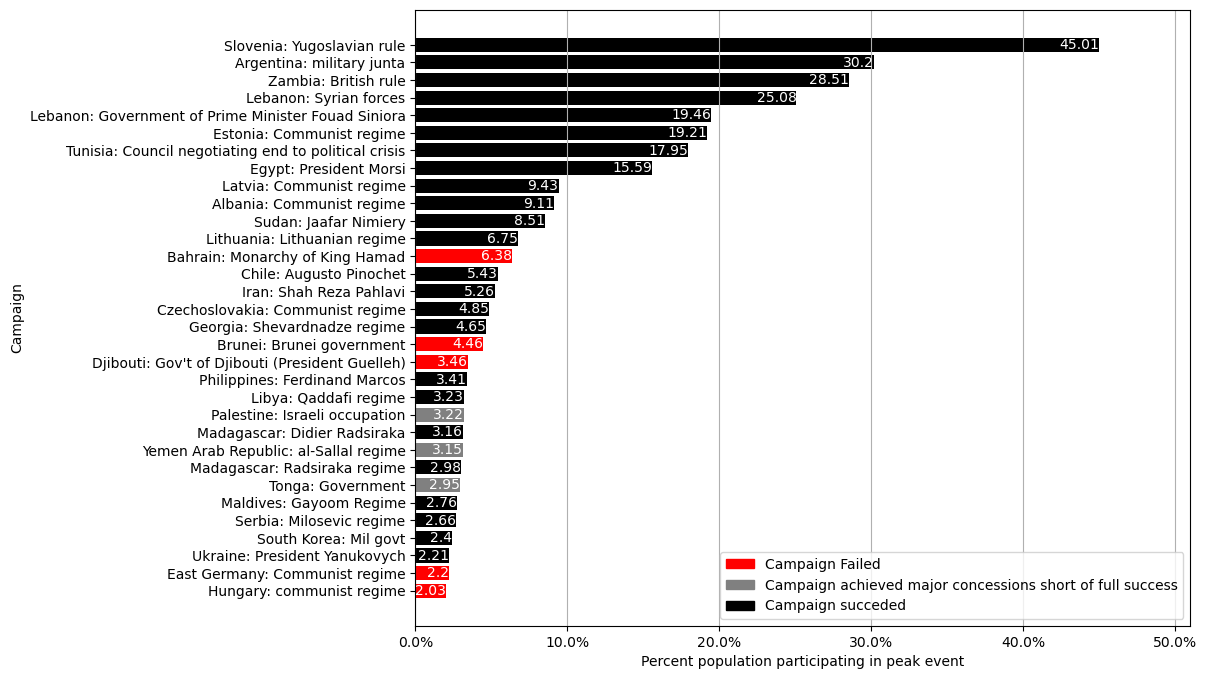

In [9]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Sort the DataFrame by the 'PERCENTAGE POPULAR PARTICIPATION' column in ascending order.
full_data = full_data.sort_values(by='PERCENTAGE POPULAR PARTICIPATION',ascending=True)


# Create a for loop to do an iteration to put the proper colors in each bar.
for index, row in full_data.iterrows():
    # Set the color based on the 'SUCCESS', 'LIMITED', 'FAILURE' values
    color = 'black' if row['SUCCESS'] == 1 else 'grey' if row['LIMITED'] == 1 else 'red'

    # Create a horizontal bar with the specified color
    bar = ax.barh(f"{row['LOCATION_x']}: {row['TARGET_x']}", row['PERCENTAGE POPULAR PARTICIPATION'], color=color)
    
    # Add the percentage value on each bar
    for rect in bar:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height()/ 2 , f'{width}', ha='right', va='center', color='white')
        # the 'ha' and 'va' parameters is to put the percentage value right before the bar ends.


# Set labels and title
ax.set_xlabel('Percent population participating in peak event')
ax.set_ylabel('Campaign')
ax.set_xticks(np.arange(0, 51, 10))
ax.set_xticklabels([f'{i}.0%' for i in np.arange(0, 51, 10)])


# Custom legend
legend_elements = [
    Patch(color='red', label='Campaign Failed'),
    Patch(color='grey', label='Campaign achieved major concessions short of full success'),
    Patch(color='black', label='Campaign succeded')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.grid(axis='x')
plt.xlim(0,51)
# Show the plot
plt.show()

## 3. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis. Your plot should look like the following; explain it as best you can.

<img src="fig_4.svg" />

Then, do the same but with only the membership per capital as dependent variable. Your plot should look like this (explain why is this different than the previous one):

<img src="fig_5.svg" />

* For the calculations of our `logit-regression` models we need to extract some columns we don't have in our `DataFrame`. First, the `logged population` is calculated if you divide the `PARTICIPATION` column with the `PERCENTAGE POPULAR PARTICIPATION` column of our `DataFrame` and convert it to logarithms. After that, to find the `membership per capita` , as defined in the `1.1 NAVCO CODEBOOK` (https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/YLLHEE/GERY7X&version=1.0&toolType=PREVIEW), is calculated if you divide the `log members` column with the `logpop` column.

In [10]:
# keep the needed columns in a new dataframe
effect_data=df[['SUCCESS','PARTICIPATION','PERCENTAGE POPULAR PARTICIPATION']]
#drop NaN values
effect_data = effect_data.dropna()
# copy the dataframe in a new dataframe named data
data=effect_data.copy()
# construct the 'LOGPOP' column which is PARTICIPATION / PERCENTAGE POPULAR PARTICIPATION
data.loc[:,'LOGPOP'] = data['PARTICIPATION']/data['PERCENTAGE POPULAR PARTICIPATION']
# convert it to logarithms
data['LOGPOP'] = np.log(data['LOGPOP'])
# take the log participation to find the log membership
data['lmemb'] = np.log(data['PARTICIPATION'])
# define the membership per capita as the ratio of 'lmemb' and 'LOGPOP'
data['membpc'] = data['lmemb']/data['LOGPOP']
# drop the columns we don't need 
data = data.drop(['PARTICIPATION','PERCENTAGE POPULAR PARTICIPATION','lmemb'],axis='columns')
# run the logistic regression
effect = logit('SUCCESS ~ membpc + LOGPOP',data=data)

In [11]:
data.membpc.sort_values()

282    0.367726
148    0.371853
21     0.373782
141    0.377073
238    0.380262
         ...   
98     0.898510
192    0.909004
384    0.916722
14     0.930431
295    0.944982
Name: membpc, Length: 380, dtype: float64

In [12]:
#Train the model
effect_res = effect.fit()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


In [13]:
effect_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.130     
Date:               2023-12-04 15:03 AIC:              447.3747  
No. Observations:   380              BIC:              459.1952  
Df Model:           2                Log-Likelihood:   -220.69   
Df Residuals:       377              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      5.1893e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -2.8142    1.4961  -1.8811  0.0600  -5.7465  0.1180
membpc          7.6475    1.1664   6.5563  0.0000   5.3613  9.9336
LOGPOP         -0.1388    0.0736  -1.8871  0.0591  -0.2830  0.0054
=================================================================

"""

# FOR THE FIRST LOGISTIC REGRESSION MODEL


* One unit increase in `Membership per capita` brings an increase of 7.6475 As for the `log odds` of a successfull campaign the odds ratio increases by $e^{7.6475}$ which is approximately 2,095.4(209,540%). This is obviously a very `big increase(not realistic)` but we should remember that `membpc` is most commonly a number between 0.34 and 0.94(see code `data.membpc.sort_values()`) so a 1 unit increase is probably unlikely. Despite that, it is the most significant variable of the significance of membpc in a campaign's success on the specific analysis.

* By also looking the Z value (~0.0000) of the independend variable `membpc` we can see that is significantly high and by that we can identify the fact that it is really important for our response variable `(SUCCESS)`.

* The `intercept` is the log odds of a succesfull campaign when all the explonatory variables are held at zero. That gives us $e^{-2.8142}$ which is approximately 0.059952661.

* Taking again the Z value (~0.0591) of the `intercept` variable we can see that is significantly low and by that we can identify the fact that it is not important for our response variable `(SUCCESS)`.

* One unit increase in `logged population` brings an increase of -0.1388 in the `log odds` of a successfull campaign(because the response variable is SUCCESS) .Thus , the odds ratio increases $e^{-0.1388}$ which is approximately 0.8704.

* Taking again the Z value (~0.0591) of the independend variable `LOGPOP` we can see that is significantly low and by that we can identify the fact that it is not important for our response variable `(SUCCESS)`.

In [14]:
# Predict the values of the model
predictions = effect_res.predict(data)
predictions

0      0.297174
1      0.302691
2      0.334318
3      0.400291
4      0.821845
         ...   
384    0.891321
385    0.449738
386    0.217118
387    0.161809
388    0.273140
Length: 380, dtype: float64

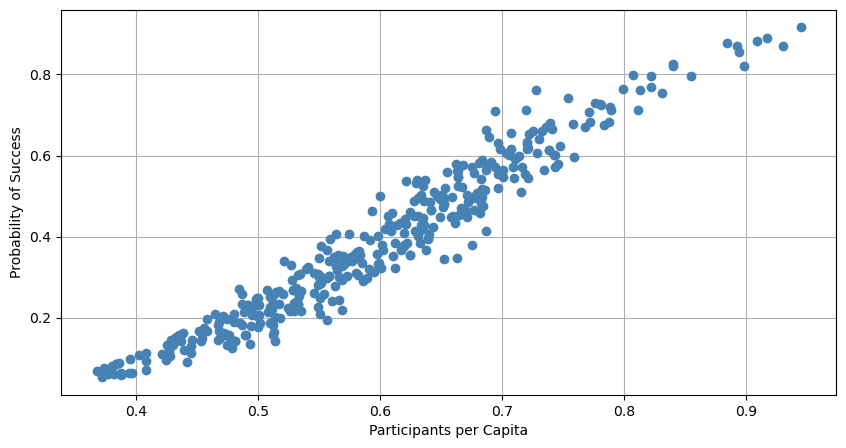

In [15]:
# create subplots and plot the logit regression model
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(data.membpc,predictions,color = 'steelblue',zorder=2)
ax.set_ylabel('Probability of Success')
ax.set_xlabel('Participants per Capita')
plt.grid(True,zorder=0)

In [16]:
# Run the 2nd logistic regression with the membpc as the only explonatory variable
effect1 = logit('SUCCESS ~ membpc',data=data)

In [17]:
# Train the model
effect_res1 = effect1.fit()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


In [18]:
effect_res1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.123     
Date:               2023-12-04 15:03 AIC:              449.0222  
No. Observations:   380              BIC:              456.9026  
Df Model:           1                Log-Likelihood:   -222.51   
Df Residuals:       378              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      3.2041e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.3469    0.7095  -7.5362  0.0000  -6.7375  -3.9563
membpc         8.0495    1.1414   7.0524  0.0000   5.8125  10.2866
=================================================================

"""

# FOR THE SECOND LOGISTIC REGRESSION MODEL 

* One unit increase in `Membership per capita` brings an increase of 8.0495 As for the `log odds` of a successfull campaign the odds ratio increases by $e^{8.0495}$ which is approximately 3,132.2(313,222%). This is obviously a very big increase(not realistic again) but we should remember that membpc is most commonly a number between 0.34 and 0.94(see code `data.membpc.sort_values()`) so a 1 unit increase is probably unlikely. Despite that, it is the most significant variable of the significance of membpc in a campaign's success on the specific analysis.

* By also looking the Z value (~0.0000)of the independend variable `membpc` we can see that is significantly high and by that we can identify the fact that it is really important for our response variable `(SUCCESS)`.

* The `intercept` is the log odds of a succesfull campaign when all the explonatory variables are held at zero. That gives us $e^{-5.3469}$ which is approximately 0.00047628.

* By looking the Z value again(~0.0000)of the `intercept` variable  we can see that is significantly high and by that we can identify the fact that it is really important for our response variable `(SUCCESS)`.


In [19]:
# Let's get the predictions of the model
predictions1 = effect_res1.predict(data)
predictions1

0      0.295117
1      0.298870
2      0.345998
3      0.434322
4      0.804936
         ...   
384    0.884145
385    0.432853
386    0.202945
387    0.139988
388    0.255078
Length: 380, dtype: float64

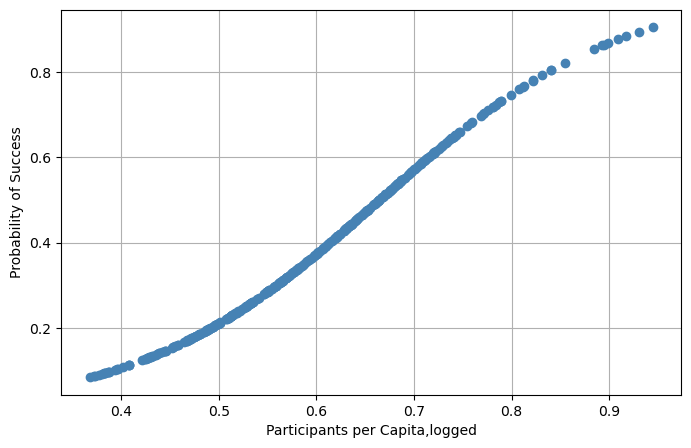

In [20]:
# plot the logit regression model
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(data.membpc,predictions1,color = 'steelblue',zorder=2)
ax.set_ylabel('Probability of Success')
ax.set_xlabel('Participants per Capita,logged')
plt.grid(True,zorder=0)

## 4. The Level of Participation Tipping Point

As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.

Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.

<table>
<thead>
<tr><th>Peak Popular Participation (%)  </th><th style="text-align: right;">  Observations</th><th>Success Rate  </th></tr>
</thead>
<tbody>
<tr><td>greater than 3.5%               </td><td style="text-align: right;">            18</td><td>88.89%        </td></tr>
<tr><td>1.0% - 3.5%                     </td><td style="text-align: right;">            41</td><td>60.98%        </td></tr>
<tr><td>0.25% - 1.0%                    </td><td style="text-align: right;">            92</td><td>45.65%        </td></tr>
<tr><td>0.06% - 0.25%                   </td><td style="text-align: right;">            95</td><td>45.26%        </td></tr>
<tr><td>0.015% - 0.06%                  </td><td style="text-align: right;">            66</td><td>24.24%        </td></tr>
<tr><td>0.0035% - 0.015%                </td><td style="text-align: right;">            44</td><td>9.09%         </td></tr>
<tr><td>less than 0.0035%               </td><td style="text-align: right;">            24</td><td>4.17%         </td></tr>
</tbody>
</table>

* In this task, we create a new DataFrame named `new_df` and we extract from the original DataFrame the columns we need, i.e. `SUCCESS` and `PERCENTAGE POPULAR PARTICIPATION` . 

* After that, we'll work on the `new_df` and we'll store in `obs(i)` and `succ_rate(i)` the observations and the success_rate for every interval required (i=1,....,7). In every time we'll filter our data based on the column `Peak Popular Participation(%)` i.e. the observations and the success rate for percentage greater than 3.5%,the observations and the success rate for percentage less than 3.5% and greater than 1% etc. Last, we'll store our findings in an arrray named `data1`.

* After that we'll create an array named `headers` to store the name of the columns we want. In the end we'll create a DataFrame named `a` with `data=data1` and `columns=headers` and with the code `display(a.style.hide(axis="index"))` we'll hide the indices to output the result like we want.

In [21]:
new_df = df[['SUCCESS','PERCENTAGE POPULAR PARTICIPATION']]

# Take the observatios and the success rate (with mean function) for the percentages greater than 3.5%
peak1 = new_df[new_df['PERCENTAGE POPULAR PARTICIPATION']>0.035]
obs1 = peak1.shape[0]
succ_rate1 = str(np.round(peak1['SUCCESS'].mean()*100,2)) + '%'

# Take the observatios and the success rate (with mean function) for the percentages less-equal than 3.5%
# and greater than 1%
peak2 = new_df[(new_df['PERCENTAGE POPULAR PARTICIPATION']<=0.035) & 
               (new_df['PERCENTAGE POPULAR PARTICIPATION']>0.01)]
obs2 = peak2.shape[0]
succ_rate2 = str(np.round(peak2['SUCCESS'].mean()*100,2)) + '%'

# Take the observatios and the success rate (with mean function) for the percentages less-equal than 1%
# and greater than 0.25%
peak3 = new_df[(new_df['PERCENTAGE POPULAR PARTICIPATION']<=0.01) & 
               (new_df['PERCENTAGE POPULAR PARTICIPATION']>0.0025)]
obs3 = peak3.shape[0]
succ_rate3 = str(np.round(peak3['SUCCESS'].mean()*100,2)) + '%'

# Take the observatios and the success rate (with mean function) for the percentages less-equal than 0.25%
# and greater than 0.06%
peak4 = new_df[(new_df['PERCENTAGE POPULAR PARTICIPATION']<=0.0025) & 
               (new_df['PERCENTAGE POPULAR PARTICIPATION']>0.0006)]
obs4 = peak4.shape[0]
succ_rate4 = str(np.round(peak4['SUCCESS'].mean()*100,2)) + '%'

# Take the observatios and the success rate (with mean function) for the percentages less-equal than 0.06%
# and greater than 0.015%
peak5 = new_df[(new_df['PERCENTAGE POPULAR PARTICIPATION']<=0.0006) & 
               (new_df['PERCENTAGE POPULAR PARTICIPATION']>0.00015)]
obs5 = peak5.shape[0]
succ_rate5 = str(np.round(peak5['SUCCESS'].mean()*100,2)) + '%'

# Take the observatios and the success rate (with mean function) for the percentages less-equal than 0.015%
# and greater than 0.0035%
peak6 = new_df[(new_df['PERCENTAGE POPULAR PARTICIPATION']<=0.00015) & 
               (new_df['PERCENTAGE POPULAR PARTICIPATION']>3.5000000000000004e-05)]
obs6 = peak6.shape[0]
succ_rate6 = str(np.round(peak6['SUCCESS'].mean()*100,2)) + '%'

# Take the observatios and the success rate (with mean function) for the percentages less than 0.0035%
# and greater than 0%
peak7 = new_df[(new_df['PERCENTAGE POPULAR PARTICIPATION']<3.5000000000000004e-05) & 
               (new_df['PERCENTAGE POPULAR PARTICIPATION']>0)]
obs7 = peak7.shape[0]
succ_rate7 = str(np.round(peak7['SUCCESS'].mean()*100,2)) + '%'

In [22]:
data1 = [
    ['greater than 3.5%',obs1,succ_rate1],
    ['1.0% - 3.5%',obs2,succ_rate2],
    ['0.25% - 1.0%',obs3,succ_rate3],
    ['0.06% - 0.25%',obs4,succ_rate4],
    ['0.015% - 0.06%',obs5,succ_rate5],
    ['0.0035% - 0.015%',obs6,succ_rate6],
    ['less than 0.0035%',obs7,succ_rate7]
]
headers = ["Peak Popular Participation (%)", "Observations", "Success Rate" ]
a = pd.DataFrame(data1,columns=headers)
display(a.style.hide(axis="index"))

Peak Popular Participation (%),Observations,Success Rate
greater than 3.5%,18,88.89%
1.0% - 3.5%,41,60.98%
0.25% - 1.0%,92,45.65%
0.06% - 0.25%,95,45.26%
0.015% - 0.06%,66,24.24%
0.0035% - 0.015%,44,9.09%
less than 0.0035%,24,4.17%


Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way.  From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

* Firstly, to find the percentage of population that is the tipping point for success in a campaign with 99% probability we'll take the predictions of our second logistic regression model. The `predictions1` will be vital for our calculation about the tipping point.

* In the beginning, we `sort` the predictions in ascending order and we store them in a variable named `sorted_probabilities`. Because the task says to find the tipping point with 99% probability we can work with the 99th percentile of our sorted predicted probabilities of success. so in the variable ` tipping_point_probability` we define the sorted probability which is in the 99th percentile; this given by the command `int(0.99 * len(sorted_probabilities))`.

* In the end, to find the value that corresponds to that all we have to do is to look in the `data.membpc` column and search where the `predictions` are equal to the `tipping_point_probability`. In a more analytical way, `np.where(predictions1 == tipping_point_probability)` : Finds the indices where the predicted probabilities match the specified tipping point probability and `[0][0]` : Retrieves the first index from the array of indices. If there are multiple occurrences of the tipping point probability, this takes the first one.

In [39]:
# Sort predicted probabilities of success in ascending order
sorted_probabilities = np.sort(predictions1)

# 99th percentile of sorted predicted probabilities of success
tipping_point_probability = sorted_probabilities[int(0.99 * len(sorted_probabilities))]

In [24]:
# Find the value that corresponds to 99th percentile predicted probability of success
tipping_point_membership = data.membpc[np.where(predictions1 == tipping_point_probability)[0][0]]

print(f"Tipping point with probability 99%: {tipping_point_membership}")

Tipping point with probability 99%: 0.663249016131024


* Based on our results, if we put this value (0.663249016131024) in the odds ratio of prob_suc / prob_fail where `prob_suc` is probability of success and `prob_fail` is probability of failure must return a number very close to 1. Indeed, this assumptions holds, the ratio is 0.9919777814417267

In [25]:
intcpt_coef=effect_res1.params['Intercept']
membpc_coef=effect_res1.params['membpc']

In [26]:
prob_suc = 1 / (1 + np.exp(-intcpt_coef -membpc_coef* tipping_point_membership))
prob_fail =  1 - (1 / (1 + np.exp(-intcpt_coef -membpc_coef* tipping_point_membership)))

prob_suc/prob_fail

0.9919777814417267

## 5. Nonviolent Resistance and Target Regime Type

Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.


* First, we import the polity dataset and we store in a DataFrame named `polity`. Also we need to install the `xlrd` library so we can read successfully the `p5v2018.xls` file.

In [27]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


* Also, we recall the df of NAVCO again in case we changed something in our previous question.

In [28]:
# read the datasets we need and store in 'df' and 'polity' variables 
df = pd.read_excel("NAVCO 1.2 Updated.xlsx")
polity = pd.read_excel('p5v2018.xls')

# keep the columns we need from df and polity dataframes.
new_df = df[['SUCCESS', 'EYEAR', 'LOCATION', 'PARTICIPATION', 'PERCENTAGE POPULAR PARTICIPATION', 'NONVIOL']].dropna()
polity_df = polity[['country', 'year', 'polity']].dropna()

# merge the two dataframes . we'll use inner join method which there is by default.
# with left_on and right_on we define the columns we need to merge.
full_data = pd.merge(new_df, polity_df, left_on=['LOCATION', 'EYEAR'], right_on=['country', 'year'])

# create a column for log population named 'logpop'
full_data['logpop'] = np.log(full_data['PARTICIPATION'] / full_data['PERCENTAGE POPULAR PARTICIPATION'])

# create a column for log participation named 'logpart'
full_data['logpart'] = np.log(full_data['PARTICIPATION'])

# drop the unecessary columns
full_data = full_data.drop(['EYEAR', 'LOCATION', 'PERCENTAGE POPULAR PARTICIPATION', 'PARTICIPATION'], axis='columns')

full_data

# run the required logistic regression, train the model and extract the summary.
lregr = logit('SUCCESS ~ NONVIOL + polity + logpart + logpop', data=full_data).fit()
lregr.summary2()

Optimization terminated successfully.
         Current function value: 0.542765
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.194     
Date:               2023-12-04 15:03 AIC:              341.0868  
No. Observations:   305              BIC:              359.6883  
Df Model:           4                Log-Likelihood:   -165.54   
Df Residuals:       300              LL-Null:          -205.27   
Converged:          1.0000           LLR p-value:      2.2774e-16
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      1.2494    1.5079   0.8286  0.4073  -1.7060   4.2049
NONVIOL        0.9251    0.2868   3.2253  0.0013   0.3629   1.4873
polity        -0.0094    0.0040  -2.3393  0.0193  -0.0173  -0.0015
logpart        0.4256    0.0873   4.8738  0.0000   0.2545   0.5968
logpop        -0.3941    0.0988  -3.9895  0.0001  -0.5877  -0.2005
=================================================================

"""

* One unit increase in `NONVIOL` brings an increase of 0.9251 As for the `log-odds` of a successfull campaign the odds ratio increases by $e^{0.9251}$ which is approximately 2.522(252.21%). In addition, it is a very significant variable in a campaign's success on the specific analysis.

* By also looking the Z value (~0.0013) of the independend variable `NONVIOL` we can see that is significantly high and by that we can identify the fact that it is really important for our response variable `(SUCCESS)`.

* The `intercept` in the `log odds` of a succesfull campaign when all the explonatory variables are held at zero: That gives us $e^{1.2494}$ which is approximately 3.48824938.

* Taking again the Z value (~0.4073) of the `intercept` variable we can see that is significantly low and by that we can identify the fact that it is not important for our response variable `(SUCCESS)`.

* One unit increase in `logged Population` brings an increase of -0.3941 in the `log odds` of a successfull campaign(because the response variable is SUCCESS) .Thus , the odds ratio increases $e^{-0.3941}$ which is approximately 0.674286.

* Taking again the Z value (~0.0001) of the independend variable `logpop` we can see that is significantly high and by that we can identify the fact that it is highly important for our response variable `(SUCCESS)`.

* One unit increase in `logged Participation` brings an increase of 0.4256 in the `log odds` of a successfull campaign(because the response variable is SUCCESS) .Thus , the odds ratio increases $e^{0.4256}$ which is approximately 1.5305.

* Taking again the Z value (~0.0000) of the independend variable `logpart` we can see that is significantly high and by that we can identify the fact that it is highly important for our response variable `(SUCCESS)`.

* One unit increase in `polity` brings an increase of -0.0094 in the `log odds` of a successfull campaign(because the response variable is SUCCESS) .Thus , the odds ratio increases $e^{-0.0094}$ which is approximately 0.990644.

* Taking again the Z value (~0.0193) of the independend variable `polity` we can see that is significantly high and by that we can identify the fact that it is highly important for our response variable `(SUCCESS)`.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, on ChatGPT, Bard, or Bing, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.